##Question 1
Plot the daily temperature over the course of the year. (This should probably be a line chart.) Create a bar chart that shows the average temperature and humidity by month.

In [6]:
from pandas import DataFrame, Series

In [8]:
import pandas as pd

In [9]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [18]:
weather = pd.read_table('data/daily_weather.tsv')

In [19]:
season_mapping = {'Spring': 'Winter', 'Winter': 'Fall', 'Fall': 'Summer', 'Summer': 'Spring'}

In [20]:
weather['season_desc'] = weather['season_desc'].map(season_mapping)

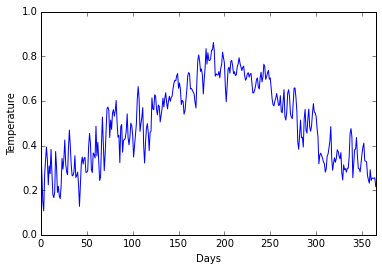

In [32]:
plt.plot(weather['temp'], 'b-')
plt.axis(xmax=365)
plt.axis(ymin=0, ymax=1)
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.show()

In [47]:
weather['Month'] = pd.DatetimeIndex(weather_data.date).month

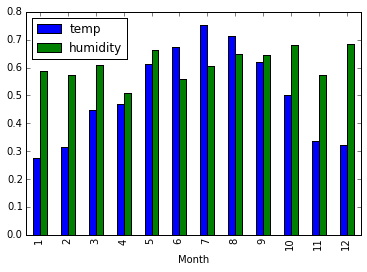

In [48]:
weather.groupby('Month')['temp', 'humidity'].mean().plot(kind='bar')

## Question 2
Use a scatterplot to show how the daily rental volume varies with temperature. Use a different series (with different colors) for each season.

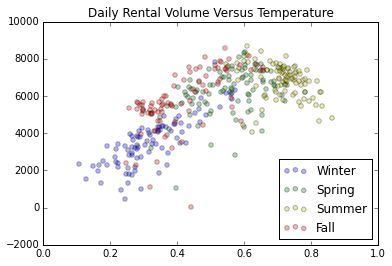

In [73]:
plt.scatter(
    weather[weather.season_desc == 'Winter']['temp'],
    weather[weather.season_desc == 'Winter']['total_riders'],
    s=20, c='b', alpha=.3, label='Winter'
)
plt.scatter(
    weather[weather.season_desc == 'Spring']['temp'],
    weather[weather.season_desc == 'Spring']['total_riders'],
    s=20, c='g', alpha=.3, label='Spring'
)
plt.scatter(
    weather[weather.season_desc == 'Summer']['temp'],
    weather[weather.season_desc == 'Summer']['total_riders'],
    s=20, c='y', alpha=.3, label='Summer'
)
plt.scatter(
    weather[weather.season_desc == 'Fall']['temp'],
    weather[weather.season_desc == 'Fall']['total_riders'],
    s=20, c='r', alpha=.3, label='Fall'
)
plt.title("Daily Rental Volume Versus Temperature")
plt.legend(loc=4)
plt.show()

## Question 3
Create another scatterplot to show how daily rental volume varies with windspeed.  As above, use a different series for each season.

## Question 4
How do the rental volumes vary with geography? Compute the average daily rentals for each station and use this as the radius for a scatterplot of each station's latitude and longitude.